Name: Amanda Baker

AndrewID: adbaker

#### a. What are the ten most common movie names of all time?

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') 

titles_df = pd.read_csv('titles.csv')
title_counter = Counter([x for x in titles_df['title']])
title_counts = sorted(title_counter.items(), reverse = True, key = itemgetter(1))

def print_lst(t, y):
    'Accepts a movie title and count from the list title_counts, and prints those values'
    print('{}. {}: {}'.format(title_counts.index((t, y)) + 1, t, y))

print('Top 10 Most Common Movie Names of All Time\n')
print_titles = [print_lst(t, y) for t, y in title_counts[:10]]

Top 10 Most Common Movie Names of All Time

1. Hamlet: 20
2. Carmen: 16
3. Macbeth: 15
4. Maya: 12
5. The Outsider: 12
6. Kismet: 11
7. Temptation: 11
8. Freedom: 11
9. The Three Musketeers: 11
10. Othello: 11


#### b. Produce a bar plot of the number of films that have been released each decade over the history of cinema, using value_counts() and the data in release_dates.csv.

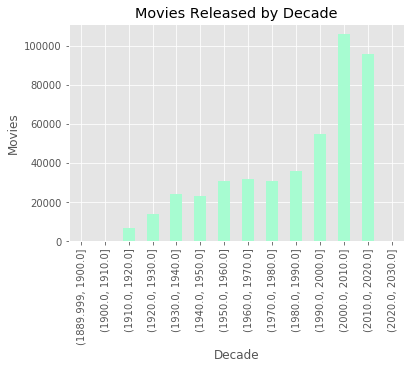

In [2]:
release_dates_df = pd.read_csv('release_dates.csv')

def compute_bins(data, bin_size):
    'Accepts a series of values and returns bins of size 10'
    min_val = np.min(data)
    max_val = np.max(data)
    min_boundary = -1.0 * (min_val % bin_size - min_val)
    max_boundary = max_val - max_val % bin_size + bin_size
    n_bins = int((max_boundary - min_boundary) / bin_size) + 1
    bins = np.linspace(min_boundary, max_boundary, n_bins)
    return bins

bins = compute_bins(release_dates_df['year'], 10.0)
release_series = release_dates_df['year'].value_counts(bins = bins).sort_index().plot(kind='bar', color='#A7FCD1')

plt.title('Movies Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Movies')
plt.xticks(rotation = 90)
plt.show()
plt.close()

#### C. Produce the same plot of (b), but this time using groupby().

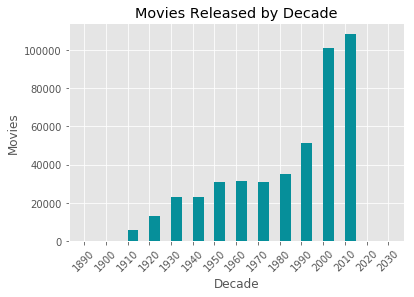

In [3]:
release_dates_df.hist(bins = bins, width = 5, color = '#068F9A')
plt.title('Movies Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Movies')
plt.xticks(bins, rotation = 45)
plt.show()

#### D. In which months are films with Tom Cruise released in the USA? Plot a bar graph for your result.

The most popular release months for Tom Cruise movies are December, and the summer months (both are big "blockbuster" movie release periods, so this makes sense).

C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

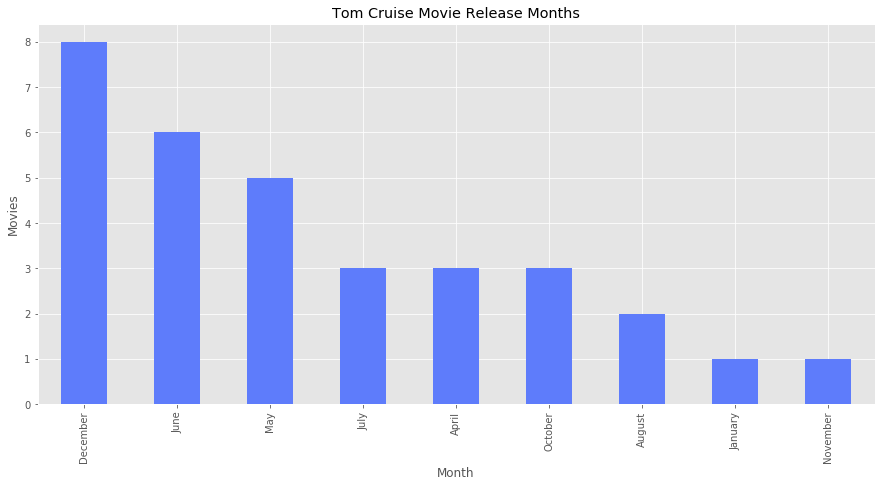

In [4]:
from datetime import datetime
import calendar

cast_df = pd.read_csv('cast_4_1960.csv')
cast_and_rdate_df = pd.merge(release_dates_df, cast_df, how = 'inner', on = ['title', 'year'])
tom_cruise_df = cast_and_rdate_df[cast_and_rdate_df['name'] == 'Tom Cruise']
tom_cruise_USA_df = tom_cruise_df[tom_cruise_df['country'] == 'USA']
tom_cruise_USA_df['release_month'] = tom_cruise_USA_df['date'].apply(lambda v: datetime.strptime(v, '%Y-%m-%d'))
tom_cruise_USA_df['release_month'] = tom_cruise_USA_df['release_month'].apply(lambda v: v.month)
tom_cruise_USA_df['release_month'] = tom_cruise_USA_df['release_month'].apply(lambda v: calendar.month_name[v])

fig, ax = plt.subplots(figsize=(15,7))
tom_cruise_USA_df['release_month'].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = '#5E7CFB')
plt.title('Tom Cruise Movie Release Months')
plt.xlabel('Month')
plt.ylabel('Movies')
plt.show()

#### E. Write a query of your interest and answer it with Pandas. Requirements (a) you need to merge at least two of the given data sets and (b) produce some meaningful graph.

Query: Do men tend to have higher listings in movie billings? How has the ratio changed over time? Does the country matter?

Answer: Based on the data and visually displayed below, men have historically recieved higher average billings than women, meaning they generally appear earlier in the credits. This does not vary much across countries, although the there is variability over time - the averages seem to stabilize in recent decades (with women appearing later in billings). South Korea is a particularly exaggerated example of this.

Of note: IMDB's billing credits are sorted as follows: "Our pages attempt to display cast lists in the same order as they appeared in the most complete on-screen listing (usually the one in the end titles). This may be different than the billing on movie posters or main titles. In some movies cast members are credited in order of appearance, while in others they are listed in alphabetical order. That's why sometimes movie stars or important characters may appear way down in the listing instead of at the top." (https://help.imdb.com/article/contribution/filmography-credits/how-are-cast-credits-ordered-why-don-t-the-main-stars-appear-at-the-top-of-the-cast/G39K5N4YYV2QJ4GR?ref_=helpsect_pro_3_4#)

In [5]:
import re

cast_df = pd.read_csv('cast_4_1960.csv')
cast_and_rdate_df = pd.merge(release_dates_df, cast_df, how = 'inner', on = ['title', 'year'])
cast_and_rdate_df = cast_and_rdate_df.drop_duplicates(subset = ['title', 'year', 'country', 'date', 'name'])
cast_and_rdate_df['date'].replace(to_replace = r'-..-..$', value = '', regex = True, inplace=True)
cast_and_rdate_df['date'] = cast_and_rdate_df['date'].apply(lambda v: datetime.strptime(v, '%Y'))


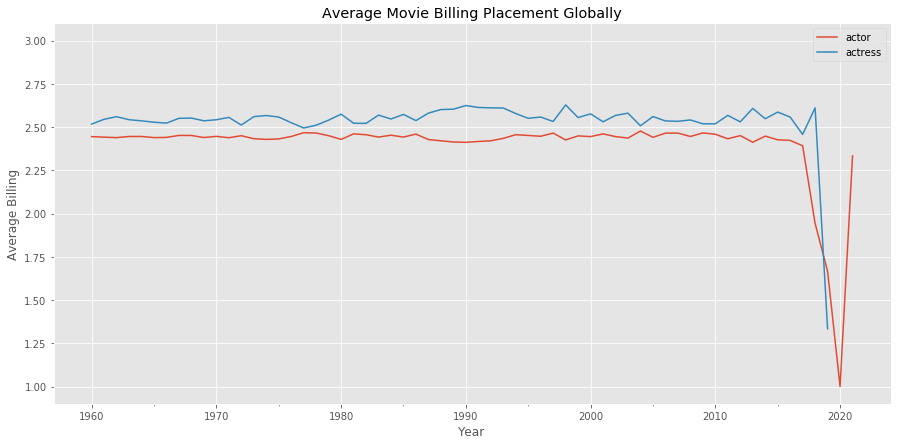

interactive(children=(Dropdown(description='Country', options=('USA', 'France', 'Japan', 'Italy', 'UK', 'Denma…

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Global graph of billing positions for actors/actresses
fig, ax = plt.subplots(figsize=(15,7))
date_type_grps = cast_and_rdate_df.groupby(['date', 'type']).apply(lambda df: df['n'].mean()).unstack().plot(ax = ax)
plt.title('Average Movie Billing Placement Globally')
plt.xlabel('Year')
plt.ylabel('Average Billing')
plt.legend(loc='upper right')
plt.show()

# Individual country's graphs of billing positions for actors/actresses
def f(Country):
    '''Accepts a country name based on user input from the dropdown menu, and returns a line graph of the average actor/actress
    billing placement (1 meaning billed first, 2 meaning billed second, etc, for first 4 movie billings per movie, over time.'''
    fig, ax = plt.subplots(figsize=(15,7))
    Country_Grp = cast_and_rdate_df[cast_and_rdate_df['country'] == Country].groupby(['date', 'type']).apply(lambda df: 
                                                                       df['n'].mean()).unstack().plot(ax = ax)
    plt.title('Average Movie Billing Placement in ' + Country)
    plt.xlabel('Year')
    plt.ylabel('Average Billing')
    plt.yticks(np.arange(5))
    plt.legend(loc='upper right')
    return None

# top_countries orders countries by number of movie releases
# change the number of countries appearing in the dropdown by changing n in .head()
top_countries = cast_and_rdate_df['country'].value_counts().head(20).index.tolist()
interact(f, Country=[x for x in top_countries]);